## Task 6.5 Unsupervised Machine Learning

### This script contains the following:

#### 1. Importing libraries
#### 2. The elbow technique
#### 3. k-means clustering

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Create a path
path = r'C:\Users\manny\Documents\Circulatory Death Analysis'

In [4]:
#Import data
df=pd.read_csv(r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data\mortalityrate.csv',index_col=False)

In [5]:
df.shape

(9487, 11)

In [6]:
df.head()

,State,State Code,Race,Ten-Year Age Groups,Ten-Year Age Groups Code,Year,Gender,Gender Code,Deaths,Population,Death Proportion
0,Alabama,1,Asian or Pacific Islander,55-64 years,55-64,2017,Male,M,10,3373,0
1,Alabama,1,Asian or Pacific Islander,65-74 years,65-74,2017,Male,M,10,1711,1
2,Alabama,1,Asian or Pacific Islander,65-74 years,65-74,2020,Female,F,13,3339,0
3,Alabama,1,Asian or Pacific Islander,75-84 years,75-84,2016,Female,F,11,992,1
4,Alabama,1,Asian or Pacific Islander,75-84 years,75-84,2017,Female,F,10,1041,1


In [50]:
columns =  ["Deaths",
            "Population",
            "Death Proportion"]

In [51]:
# Create a subset

df_1 = df[columns]

In [52]:
df_1.head()

,Deaths,Population,Death Proportion
0,10,3373,0
1,10,1711,1
2,13,3339,0
3,11,992,1
4,10,1041,1


### Cluster technique

In [53]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [54]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] 

score

C:\Users\manny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manny\anaconda3\lib\site-packages\sklearn\clust

[-661756254195829.1,
 -244030546409084.47,
 -102018814839101.73,
 -53677554363652.16,
 -35361849087058.4,
 -23711472603989.996,
 -17603180962194.7,
 -12189256363590.998,
 -10062074066148.26]

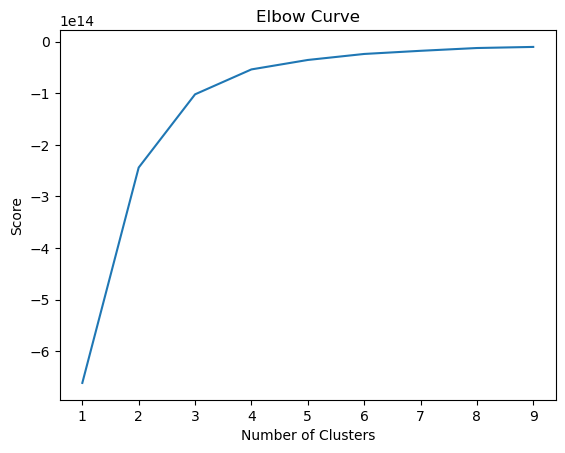

In [55]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### K-Means Clustering

In [56]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4,) 

In [57]:
# Fit the k-means object to the data.

kmeans.fit(df_1)

C:\Users\manny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [58]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df_1['clusters'] = kmeans.fit_predict(df_1)

C:\Users\manny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manny\AppData\Local\Temp\ipykernel_23956\2191434527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['clusters'] = kmeans.fit_predict(df_1)


In [59]:
df_1.head()

,Deaths,Population,Death Proportion,clusters
0,10,3373,0,1
1,10,1711,1,1
2,13,3339,0,1
3,11,992,1,1
4,10,1041,1,1


In [60]:
df_1['clusters'].value_counts()

1    7089
3    1861
0     396
2     141
Name: clusters, dtype: int64

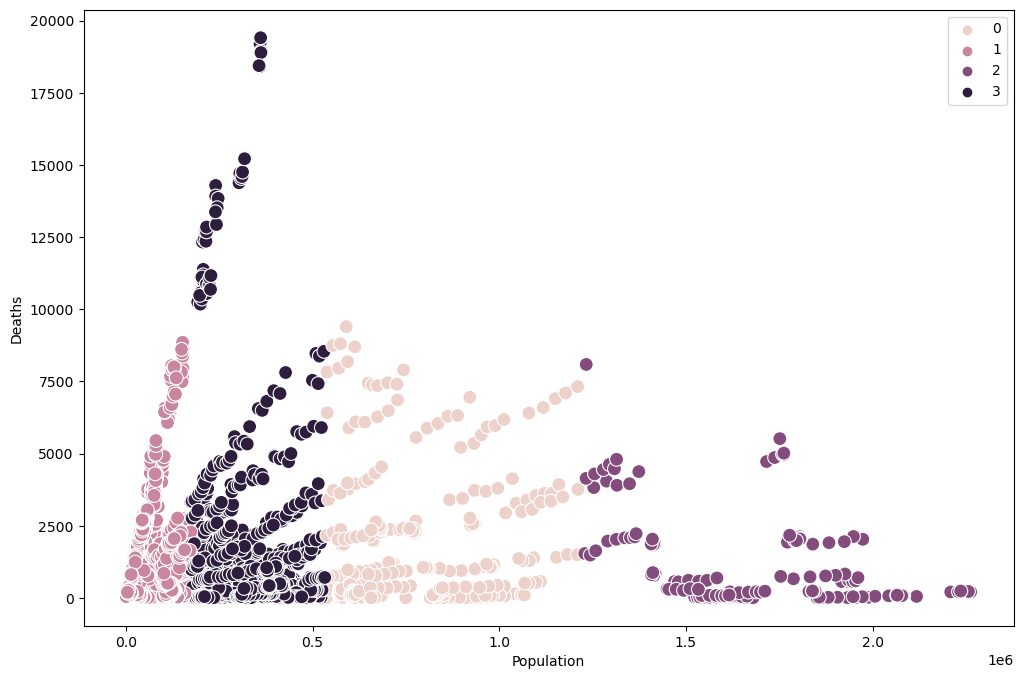

In [65]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['Population'], y=df_1['Deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Deaths') # Label y-axis.
plt.show()

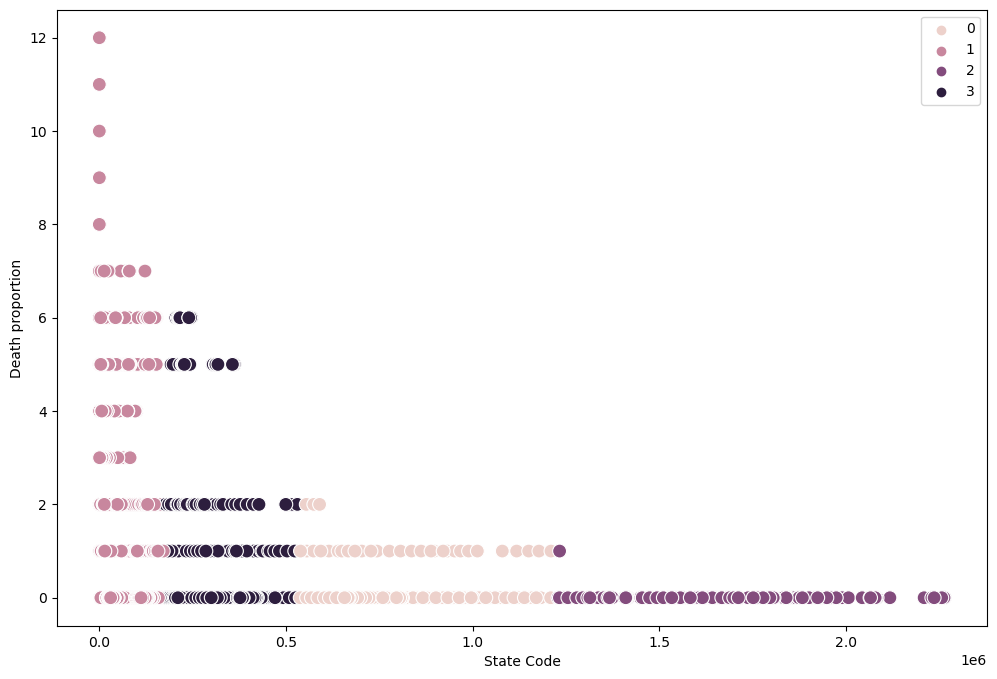

In [66]:
# Plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['Population'], y=df_1['Death Proportion'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('State Code') # Label x-axis.
plt.ylabel('Death proportion') # Label y-axis.
plt.show()

In [48]:
df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'dark purple'
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'purple'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'pink'
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\manny\AppData\Local\Temp\ipykernel_23956\2094529643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'dark purple'


In [49]:
df_1.groupby('cluster').agg({'Deaths':['mean', 'median'], 
                         'Death Proportion':['mean', 'median'], 
                          'Population':['mean', 'median']})

Deaths        Death Proportion           Population  \
                    mean median             mean median          mean   
cluster                                                                 
dark purple  1412.141414  369.5         0.126263    0.0  7.628638e+05   
light pink    921.191295  234.0         0.262225    0.0  3.063721e+05   
pink         1154.014184  314.0         0.007092    0.0  1.688787e+06   
purple        387.270701   72.0         1.409931    1.0  4.379160e+04   

                        
                median  
cluster                 
dark purple   683322.0  
light pink    292530.0  
pink         1669544.0  
purple         23674.0

The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. It would maybe provide a more holistic view on how death toll changes per category